In [19]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [20]:
T = 100.0
dt =.02
N = int(T/dt) +1
t = numpy.linspace(0.0,T,N)
print(t)

[  0.00000000e+00   2.00000000e-02   4.00000000e-02 ...,   9.99600000e+01
   9.99800000e+01   1.00000000e+02]


**Challenge question - Use arange**

In [21]:
s = numpy.arange(0,T+dt,dt)
print(s)

[  0.00000000e+00   2.00000000e-02   4.00000000e-02 ...,   9.99600000e+01
   9.99800000e+01   1.00000000e+02]


In [22]:
z0 = 100.
b0 = 5.
zt =100.
g = 9.81

u = numpy.array([z0,b0])
print("u= %s" %u)
z = numpy.zeros(N)
z[0] = z0


u= [ 100.    5.]


In [23]:
for n in range(1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

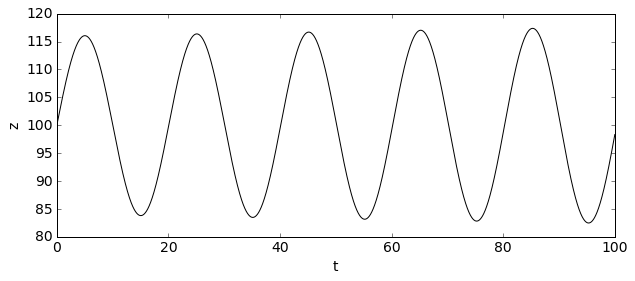

In [24]:
pyplot.figure(figsize=(10,4))   
#pyplot.ylim(40,160)             
pyplot.tick_params(axis='both', labelsize=14) 
pyplot.xlabel('t', fontsize=14) 
pyplot.ylabel('z', fontsize=14) 
pyplot.plot(t,z, 'k-');